# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi_df = pd.read_csv('train.csv')
taxi = taxi_df.copy()
taxi.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi.drop('dropoff_datetime', axis=1, inplace=True)
taxi.pickup_datetime = pd.to_datetime(taxi.pickup_datetime)
taxi.pickup_datetime.dtype

dtype('<M8[ns]')

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

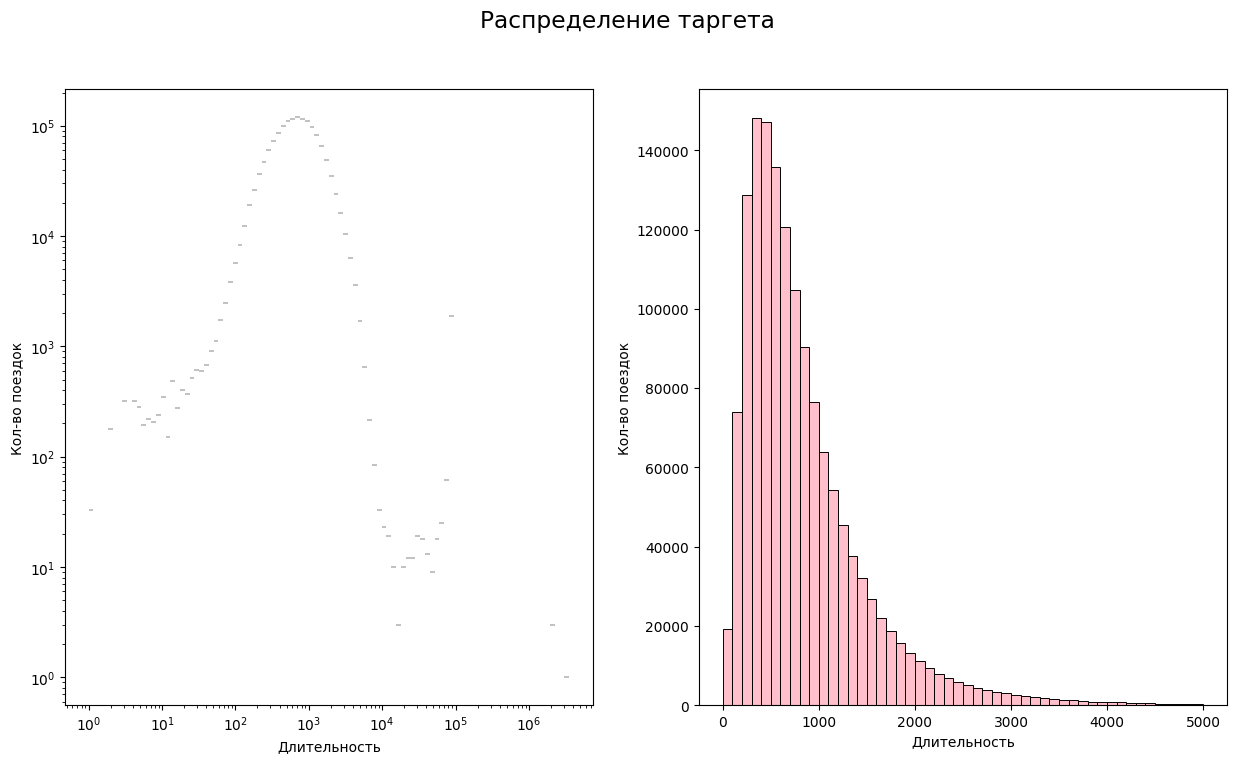

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 8))
sns.histplot(data = taxi,
             x = 'trip_duration',
             bins=100,
             ax=ax[0],
             color='#FFC0CB',
             log_scale=(True, True),
             alpha=1)

sns.histplot(data = taxi[taxi['trip_duration'] < 5000],
             x = 'trip_duration',
             bins=50,
             ax=ax[1],
             color='#FFC0CB',
             alpha=1)

plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
ax[0].set_xlabel("Длительность")
ax[0].set_ylabel("Кол-во поездок")
ax[1].set_xlabel("Длительность")
ax[1].set_ylabel("Кол-во поездок")
fig.suptitle('Распределение таргета')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Мы видим, что есть и очень быстрые поездки, и очень долгие. А вот что касается длительности поездок, почти все лежат между 300 и 1000 сек.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Ответ: RMSLE сильнее штрафует при занижении и штрафует именно порядок, что актуально для очень долгих поездок и поездок такси в целом.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Пусть: $$ a(x_i) = e^{\hat{a}(x_i)} - 1 \rightarrow \hat{a}(x_i) = \log(a(x_i) + 1) $$ Отсюда (не в уме):
$$ \text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell} \sum_{i=1}^{\ell} (\hat{y}(x_i) - \hat{a}(x_i))^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

That's why RMSLE для $a$ ~ MSE для $\hat{a}$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

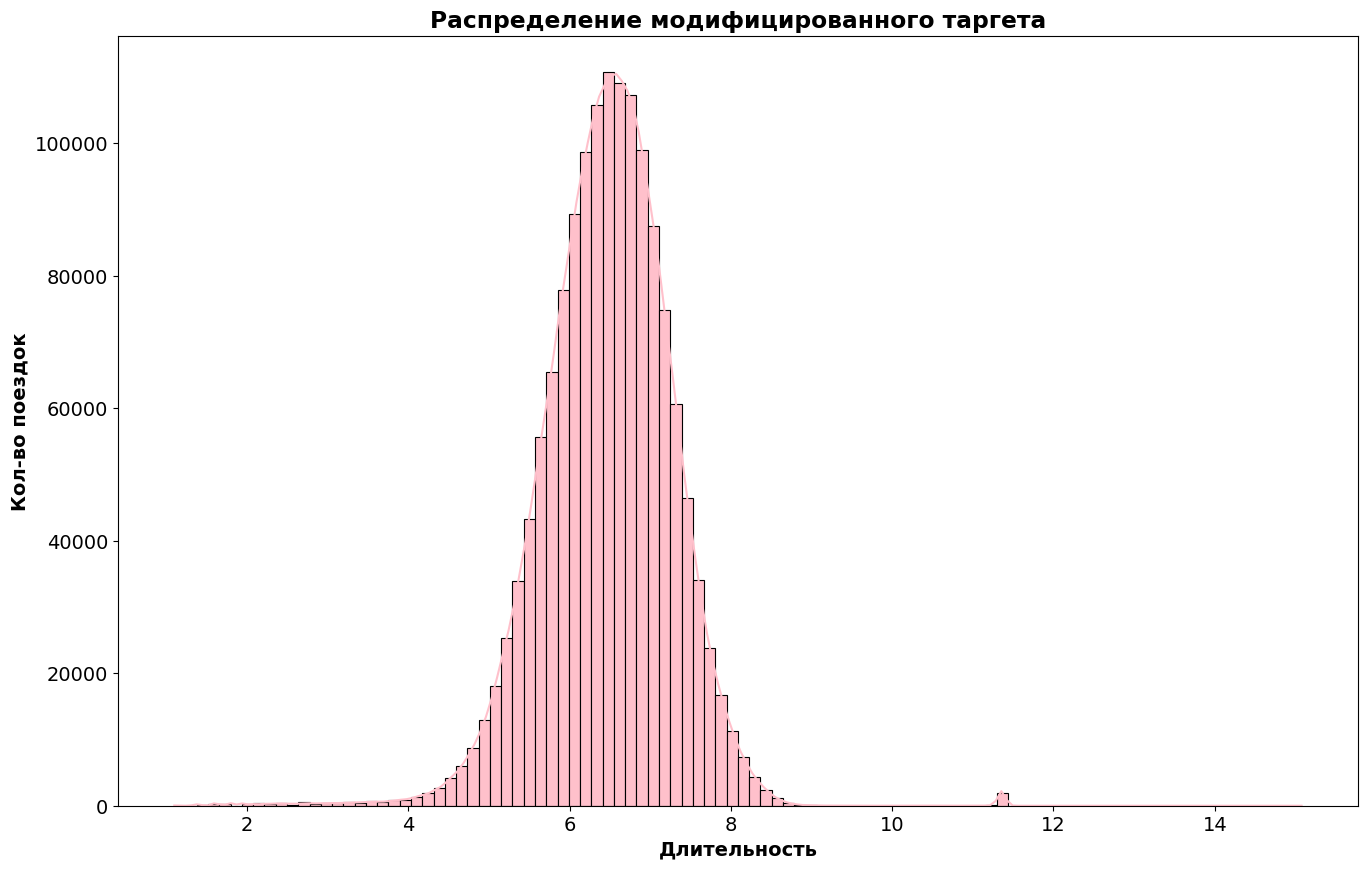

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['log_trip_duration'] = np.log1p(taxi['trip_duration'] + 1)
sns.histplot(data = taxi,
                 x = 'log_trip_duration',
                 bins = 100,
                 alpha = 1,
                 kde = True,
                 color = "#FFC0CB").set_title('Распределение модифицированного таргета')

plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['font.size'] = 14
plt.xlabel("Длительность")
plt.ylabel("Кол-во поездок")
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [8]:
from sklearn.metrics import mean_squared_error

const = taxi.log_trip_duration.mean()
mse_start = mean_squared_error(taxi.log_trip_duration, [const] * taxi.shape[0], squared = False)
print(mse_start)

0.7923870986444396


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

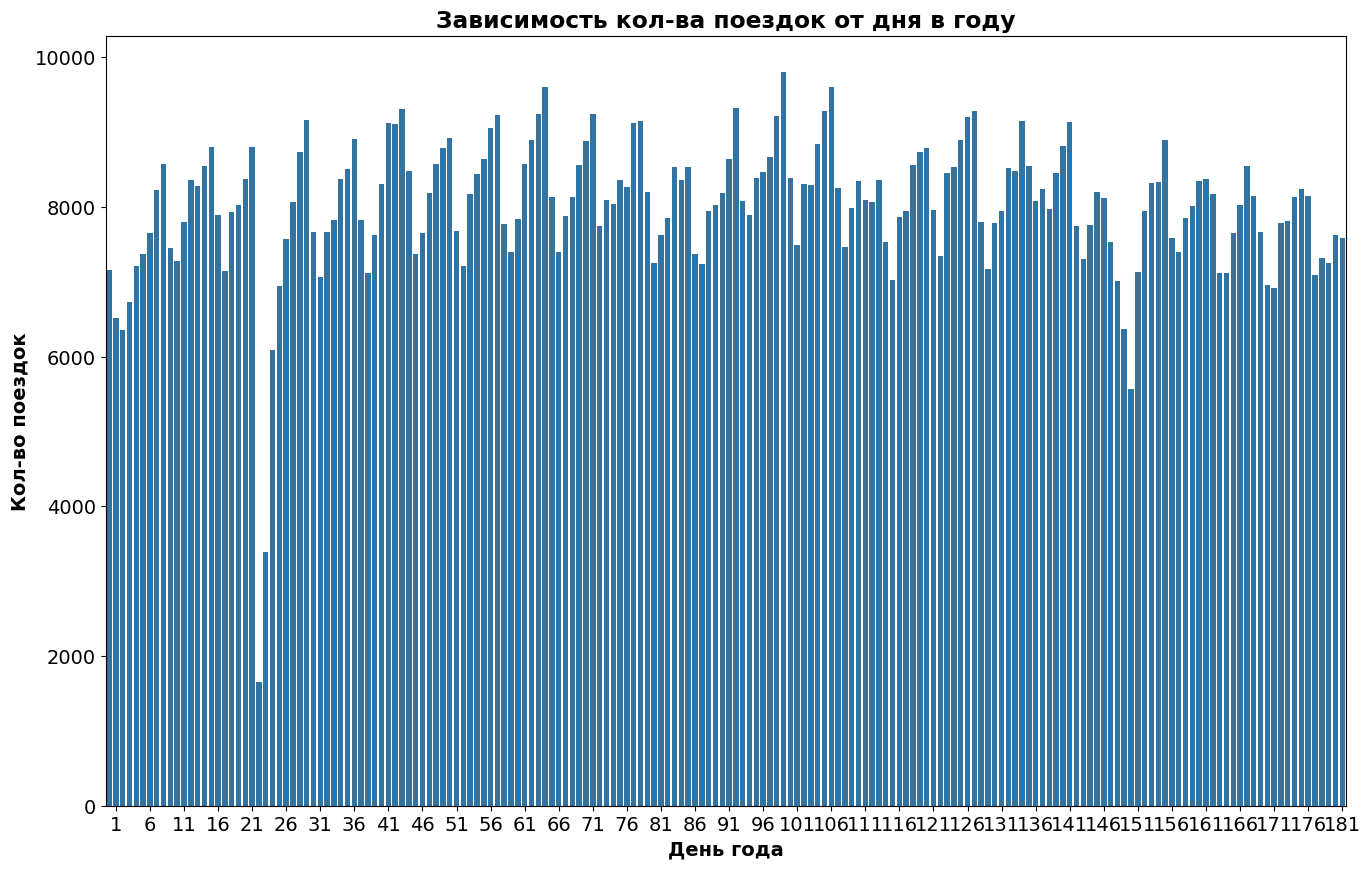

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['year_day'] = taxi.pickup_datetime.dt.dayofyear

gig = sns.countplot(x = 'year_day',
                    data = taxi.sort_values('year_day'))

plt.title('Зависимость кол-ва поездок от дня в году')
plt.xticks(range(1, len(set(taxi.year_day)), 5), list(set(taxi.year_day))[::5])
plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['font.size'] = 14
plt.xlabel("День года")
plt.ylabel("Кол-во поездок")
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.  
**Ответ:** 23.02.2016 и 24.02.2016 из-за снежного шторма стали аномалиями.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

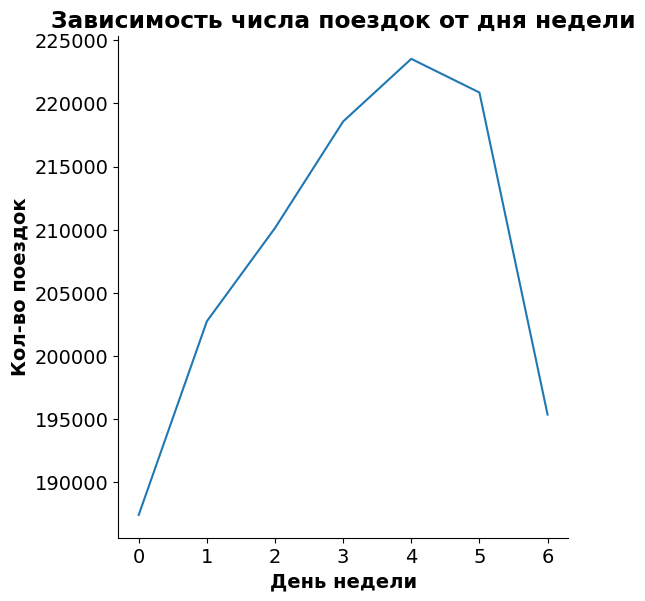

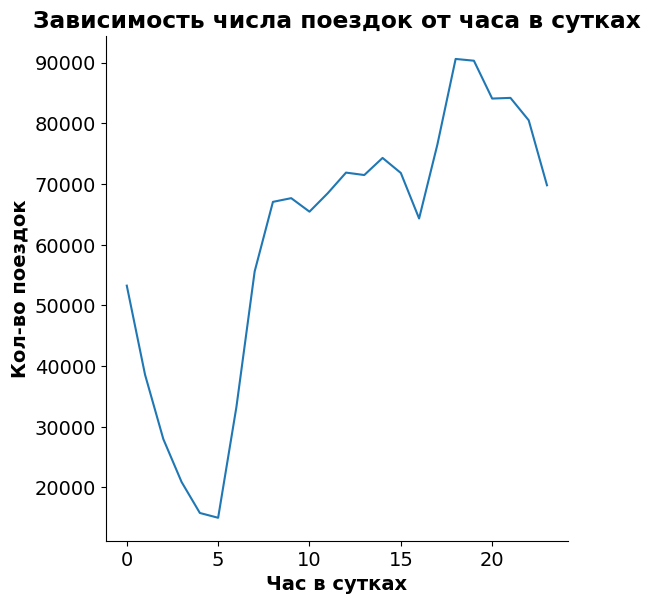

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.relplot(x = taxi['pickup_datetime'].dt.dayofweek.value_counts().index,
            y = taxi['pickup_datetime'].dt.dayofweek.value_counts(),
            kind = 'line',
            height = 6).set(title = 'Зависимость числа поездок от дня недели')

plt.rcParams['font.size'] = 14
plt.xlabel("День недели")
plt.ylabel("Кол-во поездок")
sns.relplot(x = taxi['pickup_datetime'].dt.hour.value_counts().index,
            y = taxi['pickup_datetime'].dt.hour.value_counts(),
            kind = 'line',
            height = 6).set(title = 'Зависимость числа поездок от часа в сутках')

plt.rcParams['font.size'] = 14
plt.xlabel("Час в сутках")
plt.ylabel("Кол-во поездок")
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

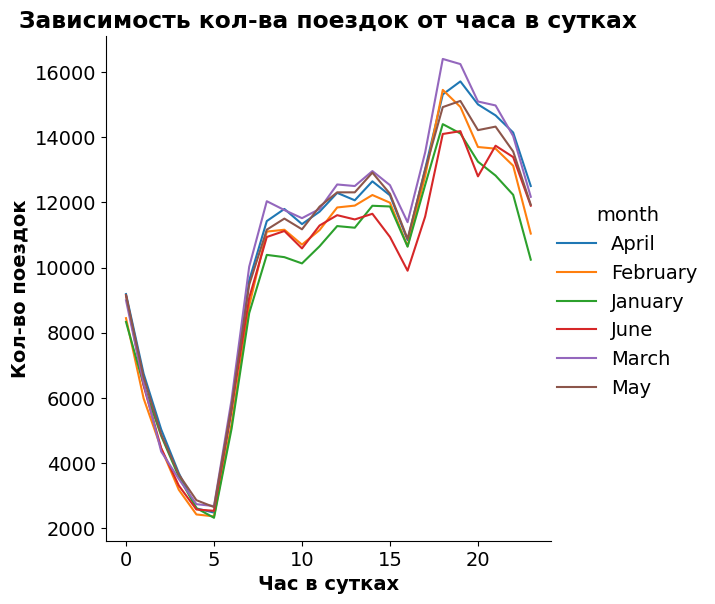

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def month_sec(col1, col2):
    dff = pd.concat([col1, col2], axis = 1)
    dff.columns = ['month', 'sec']
    return pd.DataFrame(dff.groupby(['month', 'sec'], as_index = False).size())

first_pl = month_sec(taxi['pickup_datetime'].dt.month_name(), taxi['pickup_datetime'].dt.hour)
sns.relplot(x = first_pl.sec,
            y = first_pl['size'],
            kind = 'line',
            height = 6,
            hue = first_pl.month).set(title = 'Зависимость кол-ва поездок от часа в сутках')

plt.rcParams['font.size'] = 14
plt.xlabel("Час в сутках")
plt.ylabel("Кол-во поездок")
plt.show()

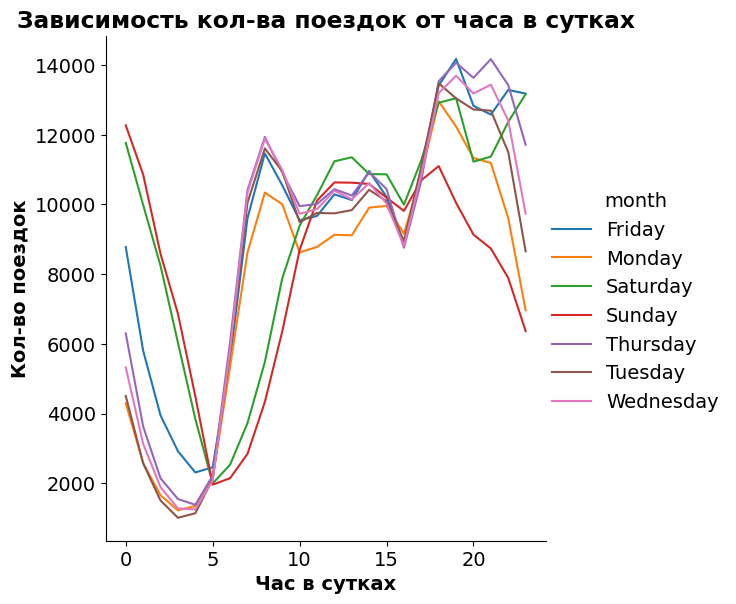

In [12]:
second_pl = month_sec(taxi['pickup_datetime'].dt.day_name(), taxi['pickup_datetime'].dt.hour)
sns.relplot(x = second_pl.sec,
            y = second_pl['size'],
            kind = 'line',
            height = 6,
            hue = second_pl.month).set(title = 'Зависимость кол-ва поездок от часа в сутках')

plt.rcParams['font.size'] = 14
plt.xlabel("Час в сутках")
plt.ylabel("Кол-во поездок")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

---


**Ответ:** Где-то в 4 и 5 часов утра дороги наименее загружены. Самое загруженное время приходится на 18 и 19 часов. На втором графике видим, что дни сильнее повторяются, чем ситуации по месяцам. Из сходств: спад ночью-утром и рост, плато и в итоге максимум.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(taxi, taxi.log_trip_duration, test_size=0.3, random_state=10)

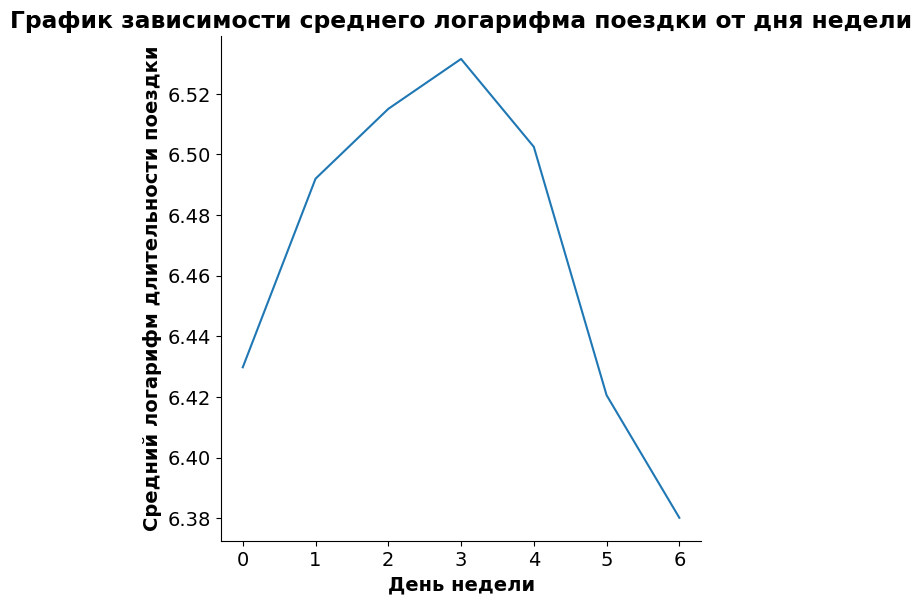

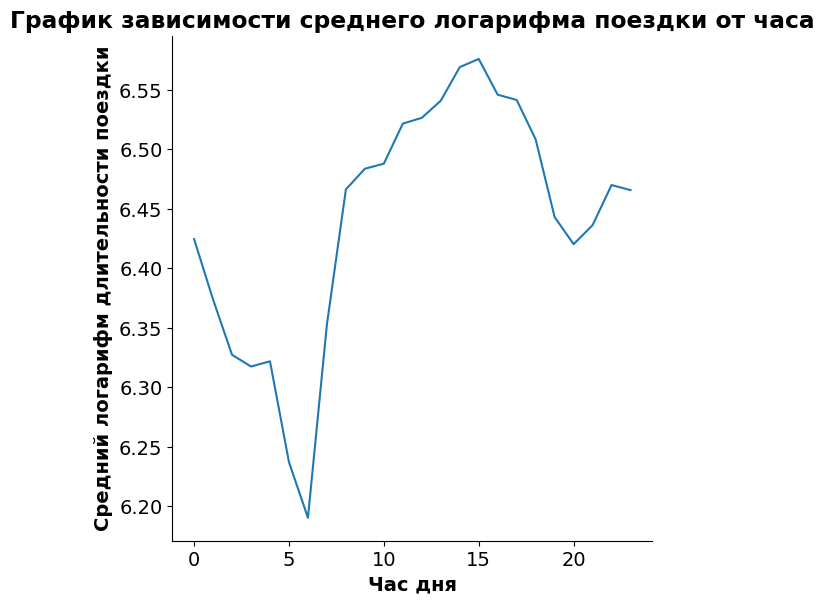

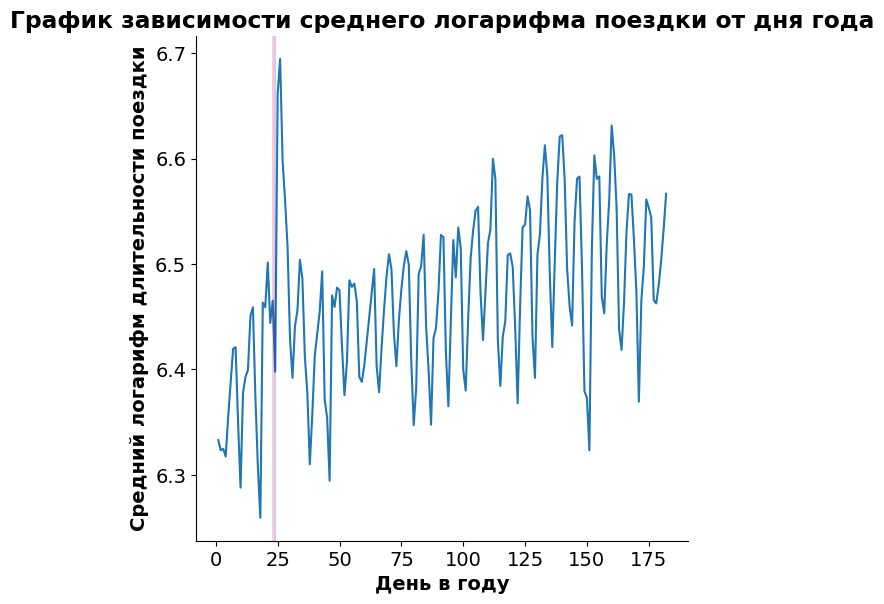

In [14]:
tmpdf1 = x_train.groupby(by = x_train['pickup_datetime'].dt.dayofweek).mean(numeric_only=True)
tmpdf2 = x_train.groupby(by = x_train['pickup_datetime'].dt.hour).mean(numeric_only=True)
tmpdf3 = x_train.groupby(by = x_train['year_day']).mean(numeric_only=True)

gplot = sns.relplot(x = tmpdf1.index,
                    y = tmpdf1.log_trip_duration,
                    kind='line',
                    height=6)

plt.title('График зависимости среднего логарифма поездки от дня недели')
gplot2 = sns.relplot(x = tmpdf2.index,
                     y = tmpdf2.log_trip_duration,
                     kind='line',
                     height=6)

plt.title('График зависимости среднего логарифма поездки от часа')
gplot3 = sns.relplot(x = tmpdf3.index,
                     y = tmpdf3.log_trip_duration,
                     kind='line',
                     height=6)

plt.title("График зависимости среднего логарифма поездки от дня года")

plt.rcParams['font.size'] = 12

gplot.set_axis_labels("День недели", "Средний логарифм длительности поездки")
gplot2.set_axis_labels("Час дня", "Средний логарифм длительности поездки")
gplot3.set_axis_labels("День в году", "Средний логарифм длительности поездки")

plt.axvline(x=23, color='red', alpha=0.2)
plt.axvline(x=24, color='blue', alpha=0.2)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** Да, вполне похожи. Кол-во поездок напрямую делает дороги более загруженными, то есть увеличивает время всех поездок. В два аномальных периодиа таргет достигает локальный минимум. Количество поездок снизилось, но тогда и их длительность также снизилась. Тренд должен быть цикличным по неделям, отсюда и появляется синусоидный график.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def addfeatures(df, main_df, hour, week_day, month):
    df['week_day'] = week_day
    df['month'] = month
    df['hour'] = hour
    anomalies = pd.DataFrame(main_df.year_day.value_counts(ascending=True)[0:2]).index
    df['anomaly1'] = df.year_day == anomalies[0]
    df['anomaly2'] = df.year_day == anomalies[1]
    return df

x_train = addfeatures(x_train, taxi, x_train.pickup_datetime.dt.hour,
                      x_train.pickup_datetime.dt.day_name(),
                      x_train.pickup_datetime.dt.month)
x_test = addfeatures(x_test, taxi, x_test.pickup_datetime.dt.hour,
                     x_test.pickup_datetime.dt.day_name(),
                     x_test.pickup_datetime.dt.month)
taxi = addfeatures(taxi, taxi, taxi.pickup_datetime.dt.hour,
                       taxi.pickup_datetime.dt.day_name(),
                   taxi.pickup_datetime.dt.month)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ:** Категориальные: часы, дни недели, день года и месяц. Мы их берем в категориальные, тк они не являются сильнее или слабее друг друга. Если зима = 1, а весна = 2, это не значит, что весна весит больше. А численные признаки как раз позволяю сравнивать вес. Например, факт того, что дата является аномалией.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [16]:
taxi.head(1)

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937          -73.96463         40.765602   

  store_and_fwd_flag  trip_duration  log_trip_duration  year_day week_day  \
0                  N            455           6.124683        74   Monday   

   month  hour  anomaly1  anomaly2  
0      3    17     False     False

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical = ['hour', 'week_day', 'year_day', 'month']
numeric = ['anomaly1', 'anomaly2']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown = "ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps = [
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared = False))

Test RMSE = 0.7832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [18]:
from typing import Iterable

def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    map = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius = 100,
            location = (row[latitude_column], row[longitude_column]),
            color = color,
            fill_color = color,
            fill = True
        ).add_to(map)

    return map

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [19]:
show_circles_on_map(taxi.sample(1000), "pickup_latitude", "pickup_longitude", "green")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ:** Возьмем аэропорт Кэннеди и аэропорт LaGuardia (я люблю летать)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [20]:
!pip install haversine

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from haversine import haversine_vector

taxi['haversine'] = haversine_vector(
      list(zip(taxi.pickup_latitude.tolist(), taxi.pickup_longitude.tolist())),
      list(zip(taxi.dropoff_latitude.tolist(),taxi.dropoff_longitude.tolist())), 'km')

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['log_haversine'] = np.log1p(taxi.haversine)

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Корреляция с логарифмом', taxi.log_haversine.corr(taxi.log_trip_duration),
      'и корреляция с расстоянием', taxi.haversine.corr(taxi.log_trip_duration))

Корреляция с логарифмом 0.7508772990773153 и корреляция с расстоянием 0.5747978604351095


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['speed'] = taxi.haversine / taxi.trip_duration * 3600
taxi.speed.corr(taxi.log_trip_duration)

-0.019600461467404174

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

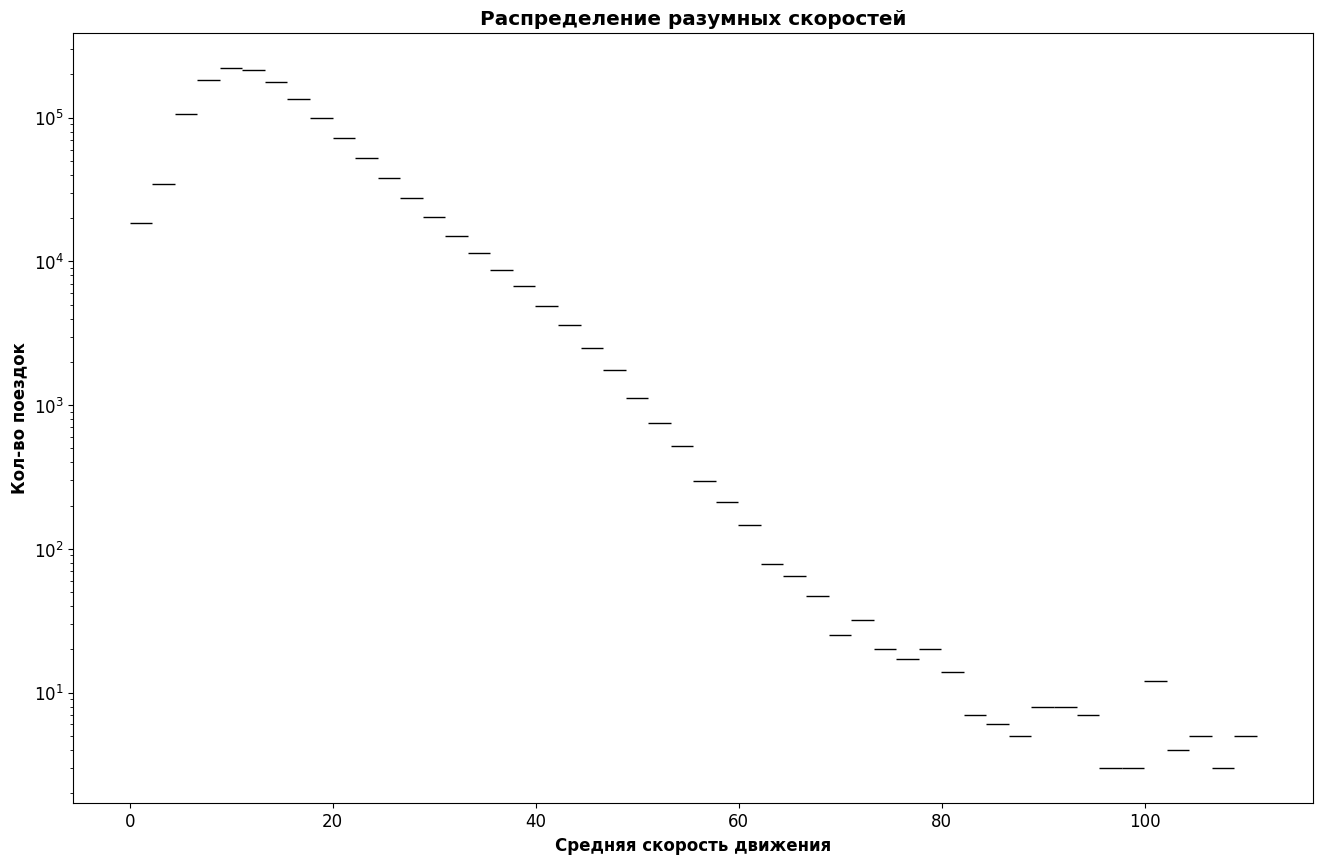

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(x = taxi[taxi.speed < taxi.speed.quantile(0.9999)].speed,
             bins = 50,
             alpha = 0.5,
             color = "pink",
             log_scale = (False, True)).set_title('Распределение разумных скоростей')

plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['font.size'] = 14
plt.xlabel("Средняя скорость движения")
plt.ylabel("Кол-во поездок")
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

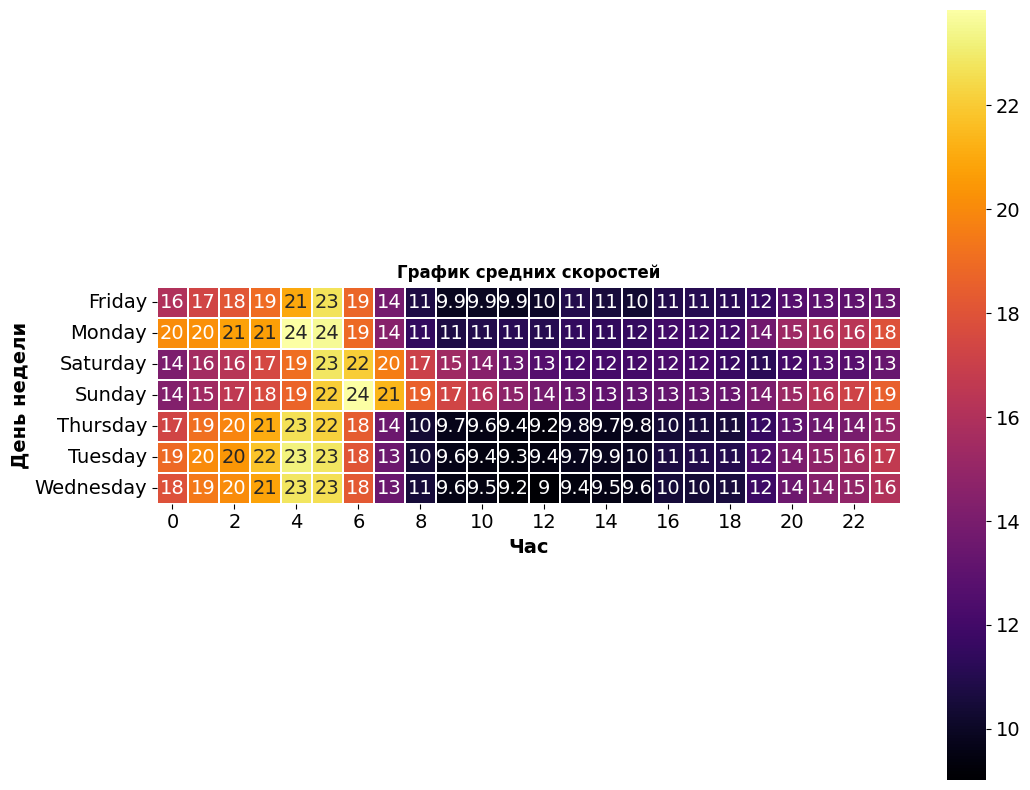

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tmp = taxi.groupby(['week_day', 'hour']).median(numeric_only = True).reset_index()
sns.heatmap(tmp.pivot(index = 'week_day', columns = 'hour', values = 'speed'),
            cmap = 'inferno',
            square = True,
            linewidths = 0.1,
            xticklabels = 2,
            annot = True)

plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['font.size'] = 10
plt.xlabel("Час")
plt.ylabel("День недели")
plt.title("График средних скоростей")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Тк корреляция между скоростью и таргетом в абсолютах очень незначительна.

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi.drop('speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

---
**Ответ:** Из графика видно, что скорость средняя наиболее велика примерно в одни и те же часы. Для будних этот промежуток с 1-2 до 6, для выходных - с 4 до 7-8. Это логично, ведь в эти часы наименьшая загруженность дорог, а значит, наибольшая возможность для скоростной езды. Напротив, с 9 до 15 в рабочие дни наблюдается минимальные значения медианы, минимальные значения выходных выстречаются с 13 до 18 (что, однако выше, чем минимумы будних).


Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
total_free = (4 <= taxi.hour) & (taxi.hour <= 6)
total_stops = (10 <= taxi.hour) & (taxi.hour <= 24)
total_free_work = ((taxi.week_day != 'Sunday') & (taxi.week_day != 'Saturday')) & (0 <= taxi.hour) & (taxi.hour <= 4)
total_stop_work = ((taxi.week_day != 'Sunday') & (taxi.week_day != 'Saturday')) & (7 <= taxi.hour) & (taxi.hour <= 10)
total_stop = (taxi.week_day == 'Friday') & (taxi.hour == 0)
total_free_ = ((taxi.week_day == 'Sunday') | (taxi.week_day == 'Saturday')) & (6 <= taxi.hour) & (taxi.hour <= 9)
total_stops_ = ((taxi.week_day == 'Sunday') | (taxi.week_day == 'Saturday')) & (0 <= taxi.hour) & (taxi.hour <= 3)
total_free_1 = (taxi.week_day == 'Sunday') & (21 <= taxi.hour) & (taxi.hour <= 24)

taxi['no_jams'] = (total_free) | (total_free_work) | (total_free_) | (total_free_1)
taxi['many_jams'] = (total_stops) | (total_stop_work) | (total_stops_) | (total_stop)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'tutorial')

kennedy_airport = geolocator.geocode("John F. Kennedy International Airport")
laguardia_airport = geolocator.geocode("LaGuardia Airport")

In [30]:
taxi['kennedy_started'] = (taxi.pickup_latitude <= kennedy_airport.latitude + 0.015) & (taxi.pickup_latitude >= kennedy_airport.latitude - 0.015) & (taxi.pickup_longitude <= kennedy_airport.longitude + 0.015)& (taxi.pickup_longitude >= kennedy_airport.longitude - 0.015)
taxi['kennedy_ended'] = (taxi.dropoff_latitude <= kennedy_airport.latitude + 0.015) & (taxi.dropoff_latitude >= kennedy_airport.latitude - 0.015) & (taxi.dropoff_longitude <= kennedy_airport.longitude + 0.015)& (taxi.dropoff_longitude >= kennedy_airport.longitude - 0.015)
taxi['laguardia_started'] = (taxi.pickup_latitude <= laguardia_airport.latitude + 0.015) & (taxi.pickup_latitude >= laguardia_airport.latitude - 0.015) & (taxi.pickup_longitude <= laguardia_airport.longitude + 0.015)& (taxi.pickup_longitude >= laguardia_airport.longitude - 0.015)
taxi['laguardia_ended'] = (taxi.dropoff_latitude <= laguardia_airport.latitude + 0.015) & (taxi.dropoff_latitude >= laguardia_airport.latitude - 0.015) & (taxi.dropoff_longitude <= laguardia_airport.longitude + 0.015)& (taxi.dropoff_longitude >= laguardia_airport.longitude - 0.015)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

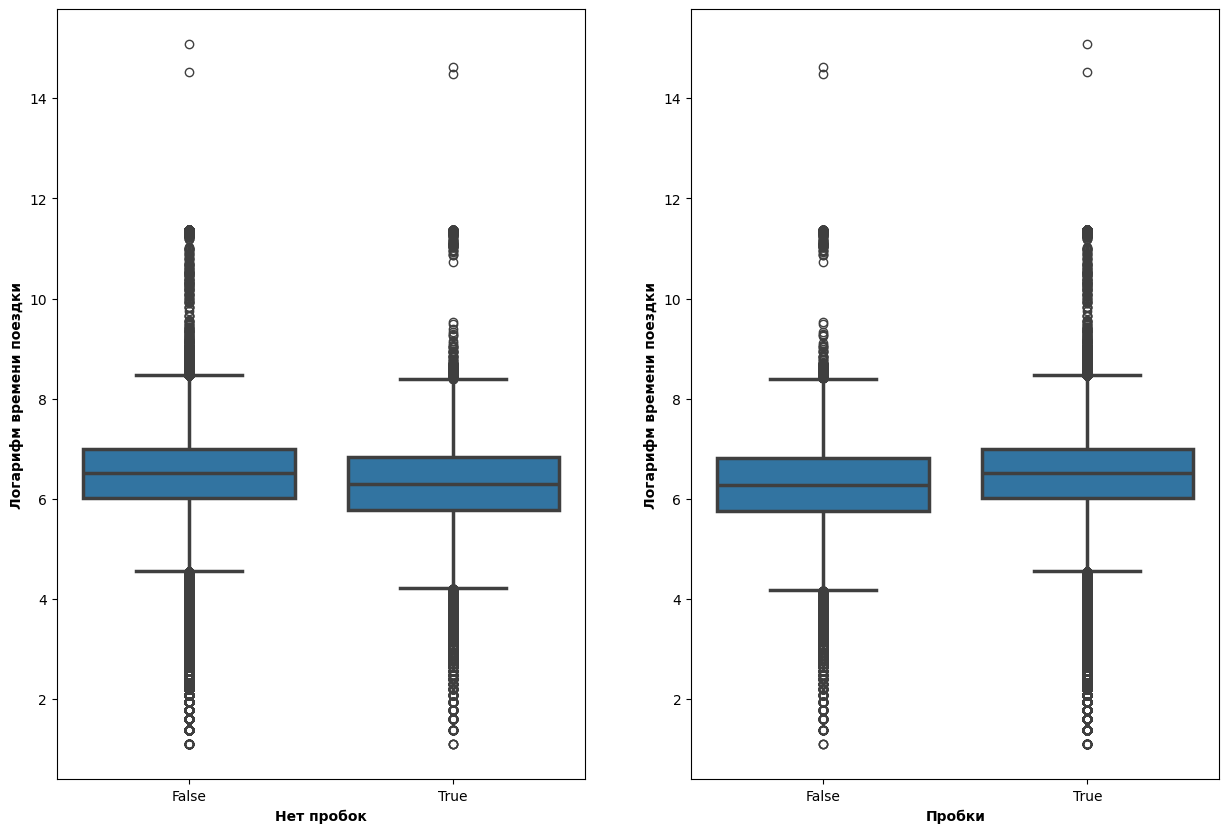

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ(гроб)
fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize=(15, 10))

sns.boxplot(ax = ax[0],
            data = taxi,
            x = 'no_jams',
            y = 'log_trip_duration',
            linewidth=2.5)

sns.boxplot(ax = ax[1],
            data = taxi,
            x = 'many_jams',
            y = 'log_trip_duration',
            linewidth = 2.5)

ax[0].set_xlabel("Нет пробок")
ax[0].set_ylabel("Логарифм времени поездки")
ax[1].set_xlabel("Пробки")
ax[1].set_ylabel("Логарифм времени поездки")

plt.show()

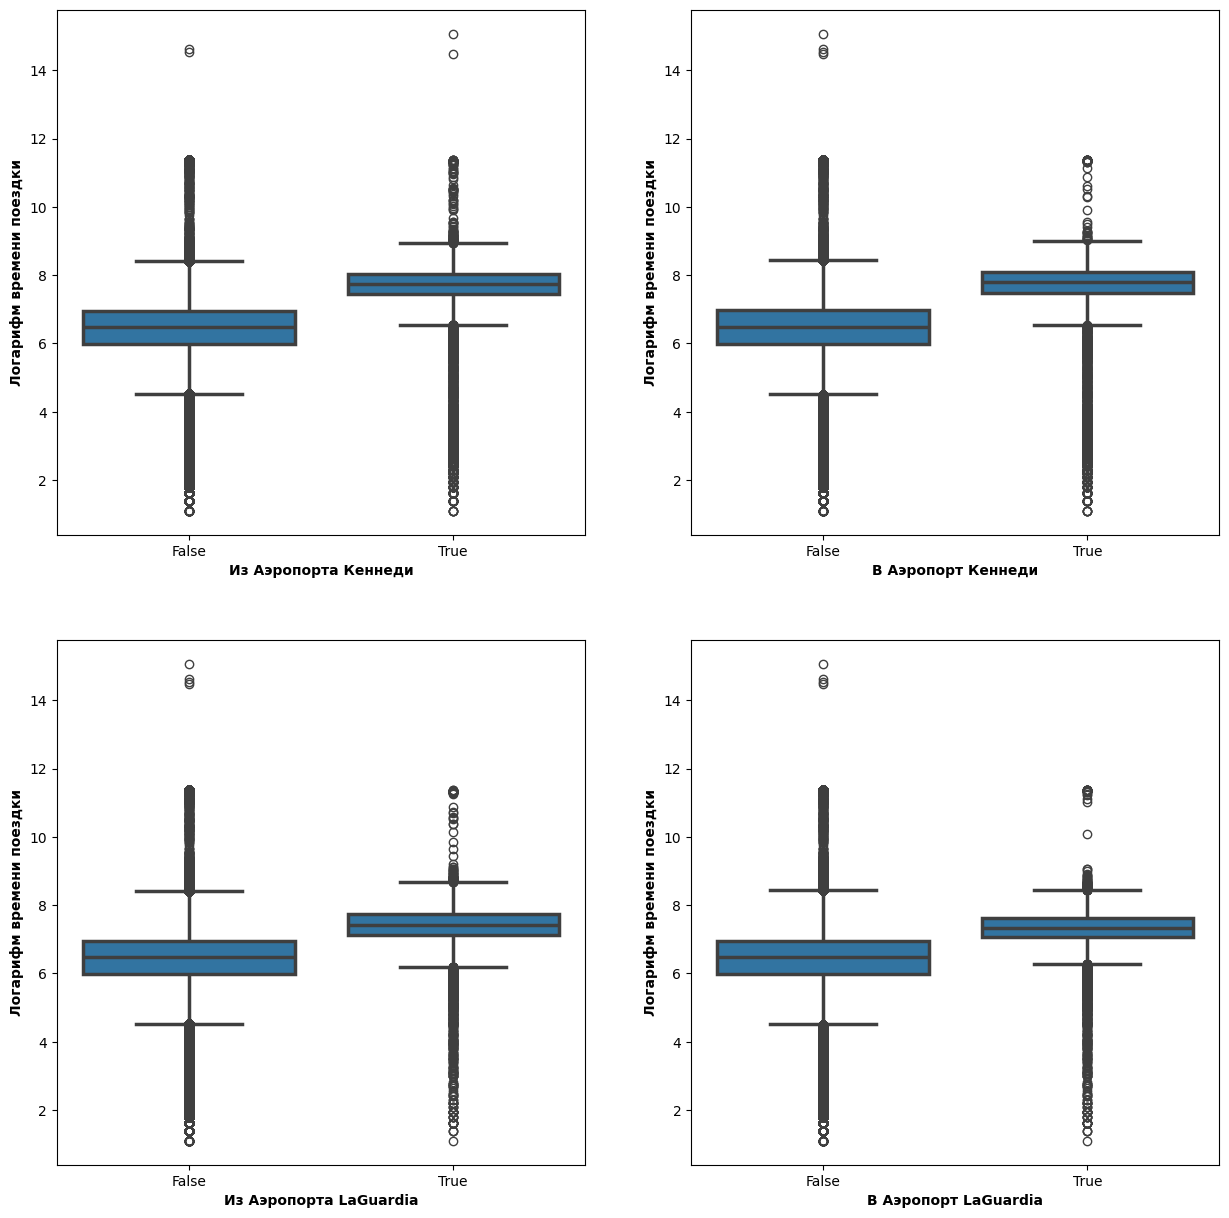

In [32]:
fig , ax = plt.subplots(nrows = 2,
                        ncols = 2,
                        figsize=(15,15))

sns.boxplot(ax=ax[0][0],
            data = taxi,
            x = 'kennedy_started',
            y = 'log_trip_duration',
            linewidth=2.5)

sns.boxplot(ax=ax[0][1],
            data = taxi,
            x = 'kennedy_ended',
            y = 'log_trip_duration',
            linewidth=2.5)

sns.boxplot(ax=ax[1][0],
            data = taxi,
            x = 'laguardia_started',
            y = 'log_trip_duration',
            linewidth=2.5)

sns.boxplot(ax=ax[1][1],
            data = taxi,
            x = 'laguardia_ended',
            y = 'log_trip_duration',
            linewidth=2.5)

ax[0][0].set_xlabel("Из Аэропорта Кеннеди")
ax[0][1].set_xlabel("В Аэропорт Кеннеди")
ax[1][0].set_xlabel("Из Аэропорта LaGuardia")
ax[1][1].set_xlabel("В Аэропорт LaGuardia")

ax[0][0].set_ylabel("Логарифм времени поездки")
ax[0][1].set_ylabel("Логарифм времени поездки")
ax[1][0].set_ylabel("Логарифм времени поездки")
ax[1][1].set_ylabel("Логарифм времени поездки")

plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Мы можем лучше оценивать таргет, т. е. продолжительность поездок. А про пробки - графики очень похожи, а значит целевая переменная не особо зависит от этого признака. Лучше всего дает значимость аэропорт.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, df):
        self.df = df
        pick = pd.concat([df.pickup_latitude, df.pickup_longitude], axis=1, keys=['lat', 'lon'])
        drop = pd.concat([df.dropoff_latitude, df.dropoff_longitude], axis=1, keys=['lat', 'lon'])
        self.total = pd.concat([pick, drop])
        self.total = self.total[(self.total.lat >= self.total.lat.quantile(0.07)) &
                                (self.total.lat <= self.total.lat.quantile(0.93)) &
                                (self.total.lon >= self.total.lon.quantile(0.07)) &
                                (self.total.lon <= self.total.lon.quantile(0.93))]
        self.left, self.right  = self.total.lon.min(), self.total.lon.max()
        self.up, self.down = self.total.lat.max(), self.total.lat.min()
        self.hor_step = (self.right - self.left) / 3
        self.ver_step = (self.up - self.down) / 4

    def transform(self, taxi):
        tmp = taxi.copy()
        tmp['pick_area'] = -1
        tmp['drop_area'] = -1
        for i in range(4):
            for j in range(3):
                tmp.loc[list(tmp[(self.left + self.hor_step * j <= tmp.pickup_longitude) &
                   (self.left + self.hor_step * (j + 1) >= tmp.pickup_longitude) &
                   (self.up - self.ver_step * i >= tmp.pickup_latitude) &
                   (self.up - self.ver_step * (i + 1) <= tmp.pickup_latitude)].index), 'pick_area'] = i * 3 + j + 1

        for i in range(4):
            for j in range(3):
                tmp.loc[list(tmp[(self.left + self.hor_step * j <= tmp.dropoff_longitude) &
                   (self.left + self.hor_step * (j + 1) >= tmp.dropoff_longitude) &
                   (self.up - self.ver_step * i >= tmp.dropoff_latitude) &
                   (self.up - self.ver_step * (i + 1) <= tmp.dropoff_latitude)].index), 'drop_area'] = i * 3 + j + 1
        return tmp

In [34]:
model = MapGridTransformer(taxi)
taxi = model.transform(taxi)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train, x_test, y_train, y_test = train_test_split(taxi, taxi.log_trip_duration, test_size = 0.3, random_state = 10)

categorical = taxi.columns[11:15].tolist() + taxi.columns[25:27].tolist()
numeric = taxi.columns[15:17].tolist() + taxi.columns[18:19].tolist() + taxi.columns[21:25].tolist()

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown = "ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps = [
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train[categorical + numeric], y_train)
y_pred = model.predict(x_test[categorical + numeric])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared = False))

Test RMSE = 0.4724


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

---
**Ответ:**  Я думаю что vendor_id может показывать таксопарк и указывать на априорную разницу в поездках. passenger_count потенциально влияет на время поездки, тк бывает, что людям надо в разные точки. store_and_fwd_flag покажет выбросы, так как если данные не льются/прольются плохо, то это отразится на общей картине.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for col in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    print('Признак {0}'.format(col))
    print(display(pd.DataFrame(taxi[col].value_counts())))
    print()

Признак vendor_id


count
vendor_id        
2          780302
1          678342

None

Признак passenger_count


count
passenger_count         
1                1033540
2                 210318
5                  78088
3                  59896
6                  48333
4                  28404
0                     60
7                      3
9                      1
8                      1

None

Признак store_and_fwd_flag


count
store_and_fwd_flag         
N                   1450599
Y                      8045

None



Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

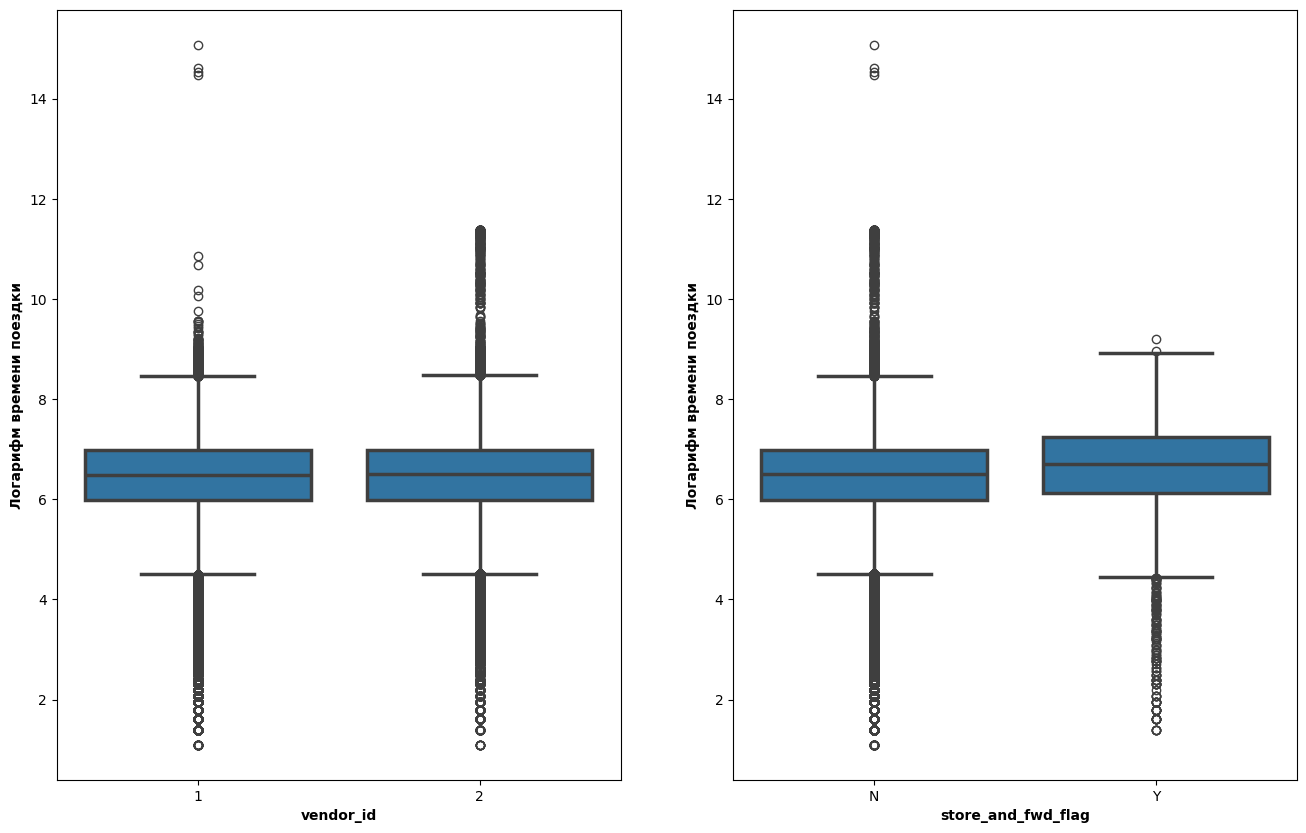

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,10))

sns.boxplot(ax = ax[0],
            data = taxi,
            x = 'vendor_id',
            y = 'log_trip_duration',
            linewidth = 2.5)

sns.boxplot(ax = ax[1],
            data = taxi,
            x = 'store_and_fwd_flag',
            y = 'log_trip_duration',
            linewidth=2.5)

plt.rcParams['font.size'] = 10

ax[0].set_ylabel("Логарифм времени поездки")
ax[1].set_ylabel("Логарифм времени поездки")
plt.show()

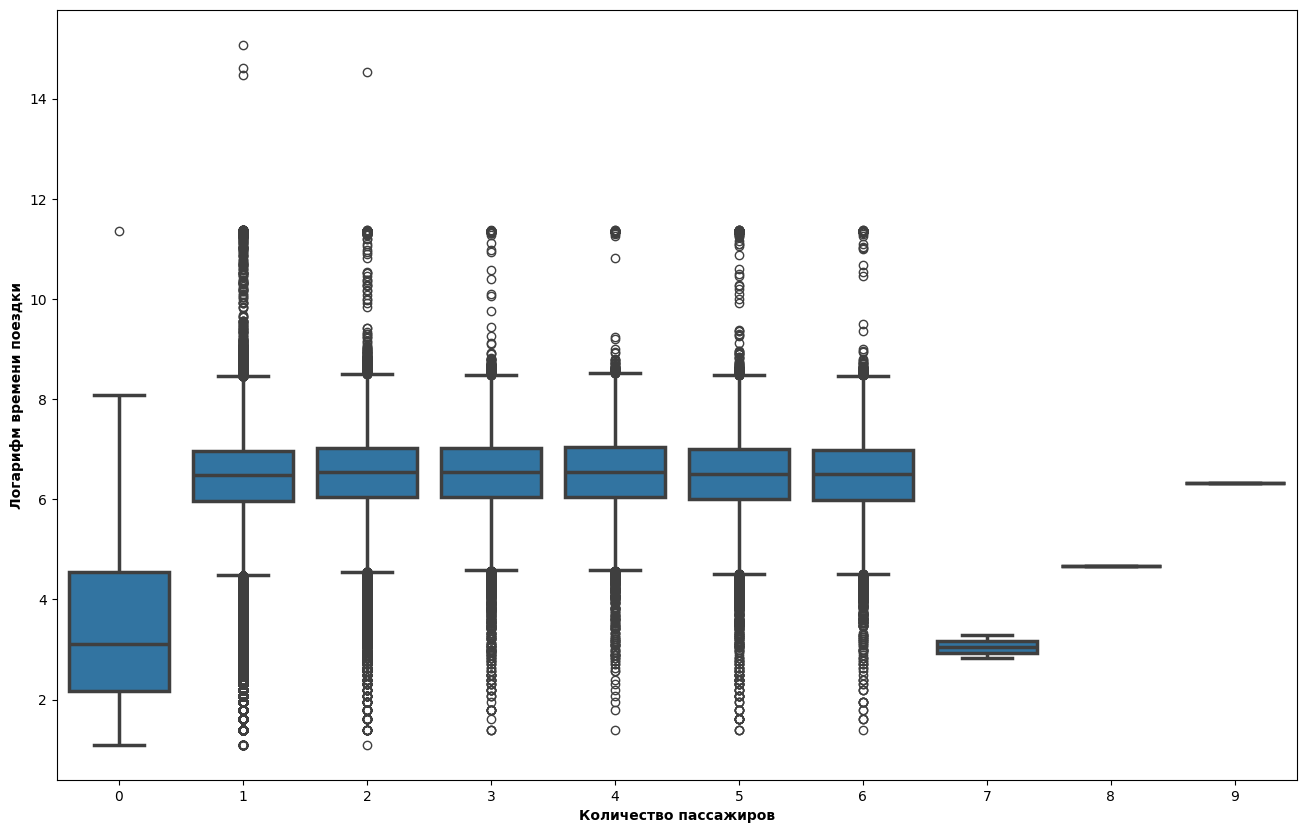

In [38]:
sns.boxplot(data = taxi,
            x = 'passenger_count',
            y = 'log_trip_duration',
            linewidth=2.5)

plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['font.size'] = 10

plt.xlabel("Количество пассажиров")
plt.ylabel("Логарифм времени поездки")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi.store_and_fwd_flag = taxi.store_and_fwd_flag == 'Y'
taxi.vendor_id = taxi.vendor_id == 2

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

---
**Ответ:** Графики очень похожи, поэтому vendor_id и store_and_fwd_flag вряд ли будут особо полезными. Что касается кол-ва пассажиров - ситуации с 0 пассажиров выделяются, что может дать какой-то аплифт к качеству модели, но я думаю, что очень незначительный.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train, x_test, y_train, y_test = train_test_split(taxi, taxi.log_trip_duration, test_size = 0.3, random_state = 10)

categorical += taxi.columns[1:2].tolist() + taxi.columns[8:9].tolist()
numeric += taxi.columns[3:4].tolist()

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown = "ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train[categorical + numeric], y_train)
y_pred = model.predict(x_test[categorical + numeric])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared = False))

Test RMSE = 0.4722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['error'] = (y_train - model.predict(x_train)) ** 2

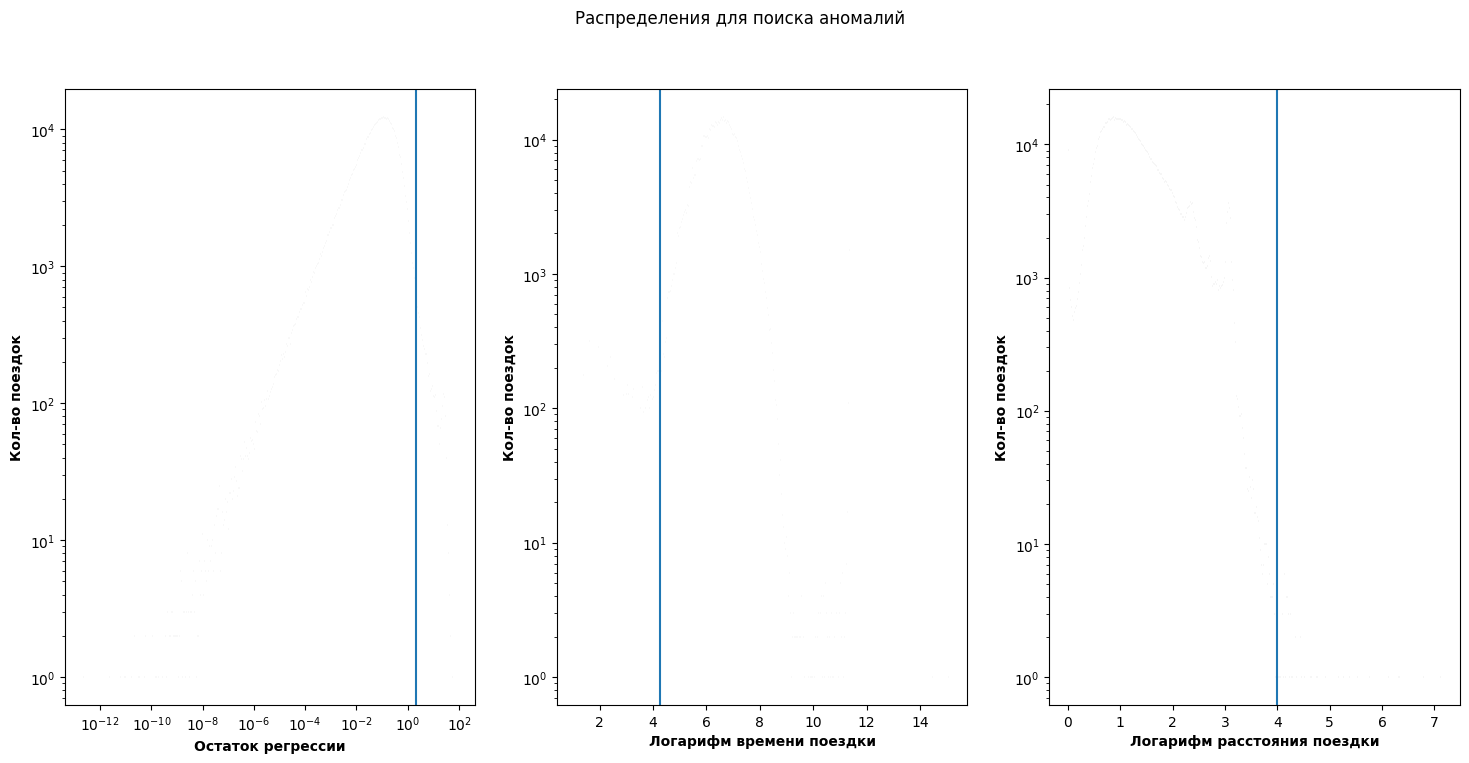

In [42]:
fig , ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 8))
firstg = sns.histplot(x = taxi.error,
                      log_scale = [True, True],
                      ax = ax[0])

firstg.axvline(x=taxi.error.quantile(0.99))

secondg = sns.histplot(data = taxi,
                      x = 'log_trip_duration',
                      ax = ax[1],
                      log_scale = [False, True])

secondg.axvline(x=taxi.log_trip_duration.quantile(0.007))

thirdg = sns.histplot(data = taxi,
                      x = 'log_haversine',
                      ax = ax[2],
                      log_scale = [False, True])

thirdg.axvline(x=taxi.log_haversine.quantile(0.99995))

ax[0].set_xlabel("Остаток регрессии")
ax[0].set_ylabel("Кол-во поездок")
ax[1].set_xlabel("Логарифм времени поездки")
ax[1].set_ylabel("Кол-во поездок")
ax[2].set_xlabel("Логарифм расстояния поездки")
ax[2].set_ylabel("Кол-во поездок")
plt.suptitle('Распределения для поиска аномалий')
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [43]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
taxi['arrival'] = taxi.kennedy_started + taxi.laguardia_started
taxi['departure'] = taxi.kennedy_ended + taxi.laguardia_ended
taxi['anomaly_total'] = taxi.anomaly1 + taxi.anomaly2
newtaxi = taxi.copy()
taxi.drop(['kennedy_started', 'kennedy_ended',
           'laguardia_started', 'laguardia_ended',
           'anomaly1', 'anomaly2'],
           axis = 1, inplace = True)

<ipython-input-43-6bda70d0fff4>:2: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  taxi['arrival'] = taxi.kennedy_started + taxi.laguardia_started
<ipython-input-43-6bda70d0fff4>:3: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  taxi['departure'] = taxi.kennedy_ended + taxi.laguardia_ended
<ipython-input-43-6bda70d0fff4>:4: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  taxi['anomaly_total'] = taxi.anomaly1 + taxi.anomaly2


In [44]:
x_train, x_test, y_train, y_test = train_test_split(taxi, taxi.log_trip_duration, test_size = 0.3, random_state = 10)

x_train.drop(x_train[(x_train.error > x_train.error.quantile(0.999))
          | (x_train.log_trip_duration < x_train.log_trip_duration.quantile(0.007))
          | (x_train.log_haversine > x_train.log_haversine.quantile(0.99995))].index, inplace=True)

y_train = x_train.log_trip_duration

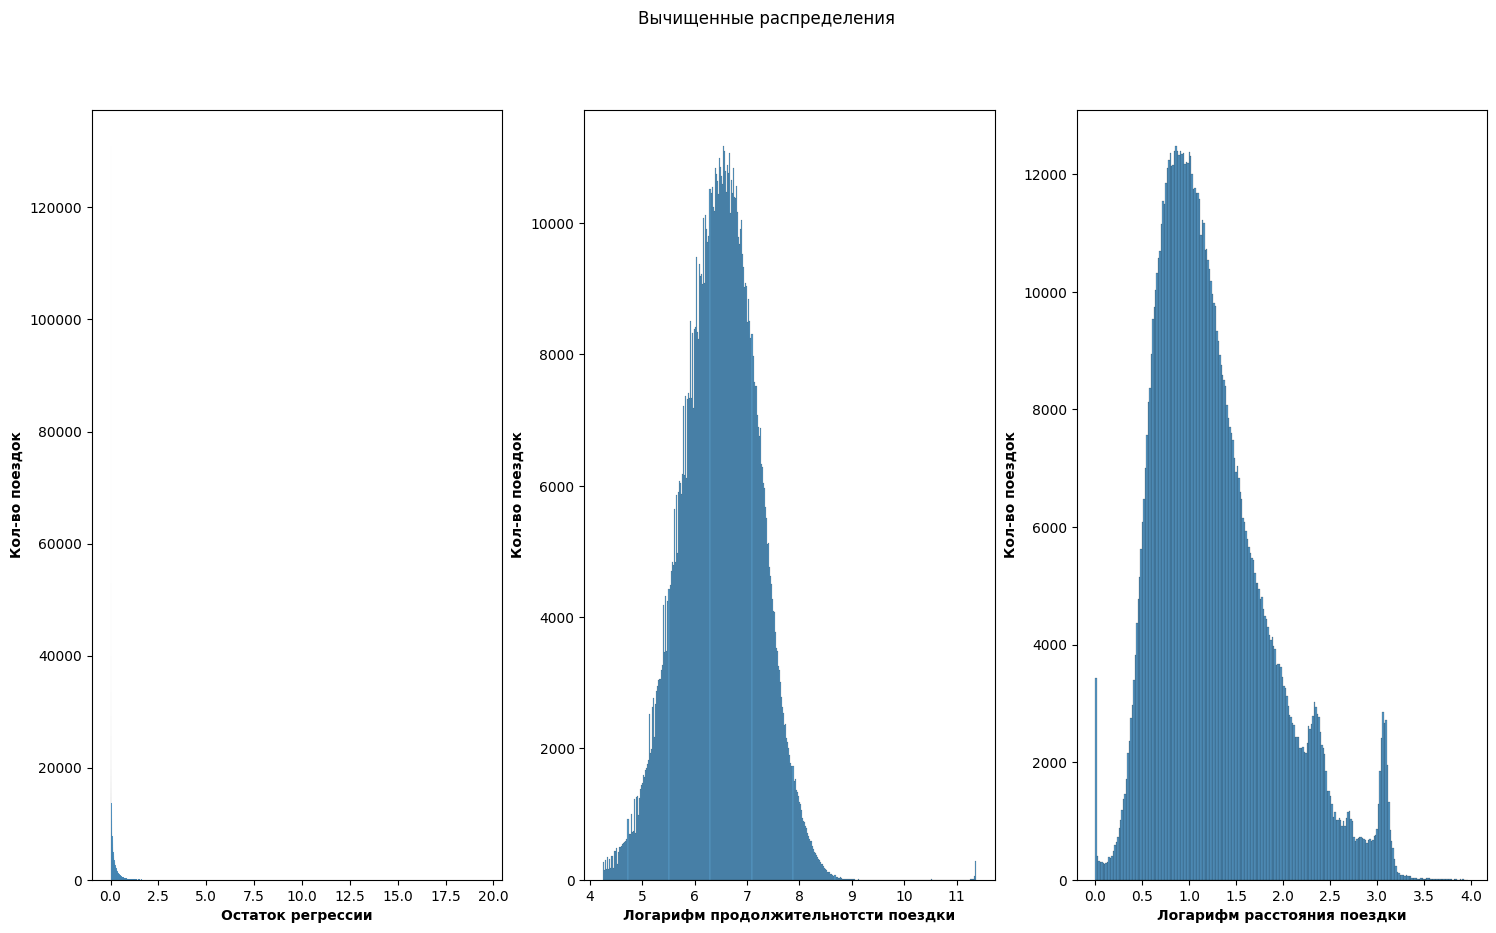

In [45]:
fig , ax = plt.subplots(nrows = 1,
                        ncols = 3,
                        figsize = (18, 10))

firstg = sns.histplot(x = x_train.error,
                      ax = ax[0])

secondg = sns.histplot(data = x_train,
                       x = 'log_trip_duration',
                       ax = ax[1])

thirdg = sns.histplot(data = x_train,
                      x = 'log_haversine',
                      ax = ax[2])

ax[0].set_xlabel("Остаток регрессии")
ax[0].set_ylabel("Кол-во поездок")
ax[1].set_xlabel("Логарифм времени поездки")
ax[1].set_ylabel("Кол-во поездок")
ax[2].set_xlabel("Логарифм расстояния поездки")
ax[2].set_ylabel("Кол-во поездок")

plt.suptitle('Вычищенные распределения')
plt.show()

In [46]:
categorical = x_train.columns[11:15].tolist() + x_train.columns[19:21].tolist()
numeric = x_train.columns[16:19].tolist() + x_train.columns[22:25].tolist()

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps = [
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train[categorical + numeric], y_train)
y_pred = model.predict(x_test[categorical + numeric])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared = False))

Test RMSE = 0.4717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('До OHE -', taxi[categorical + numeric].shape[1], 'и после',
      column_transformer.transform(x_train[categorical + numeric]).shape[1])

До OHE - 12 и после 251


## Оценка: 7 баллов

Прошу не вычитать за это задание баллы за сдачу после дедлайна. Мем:

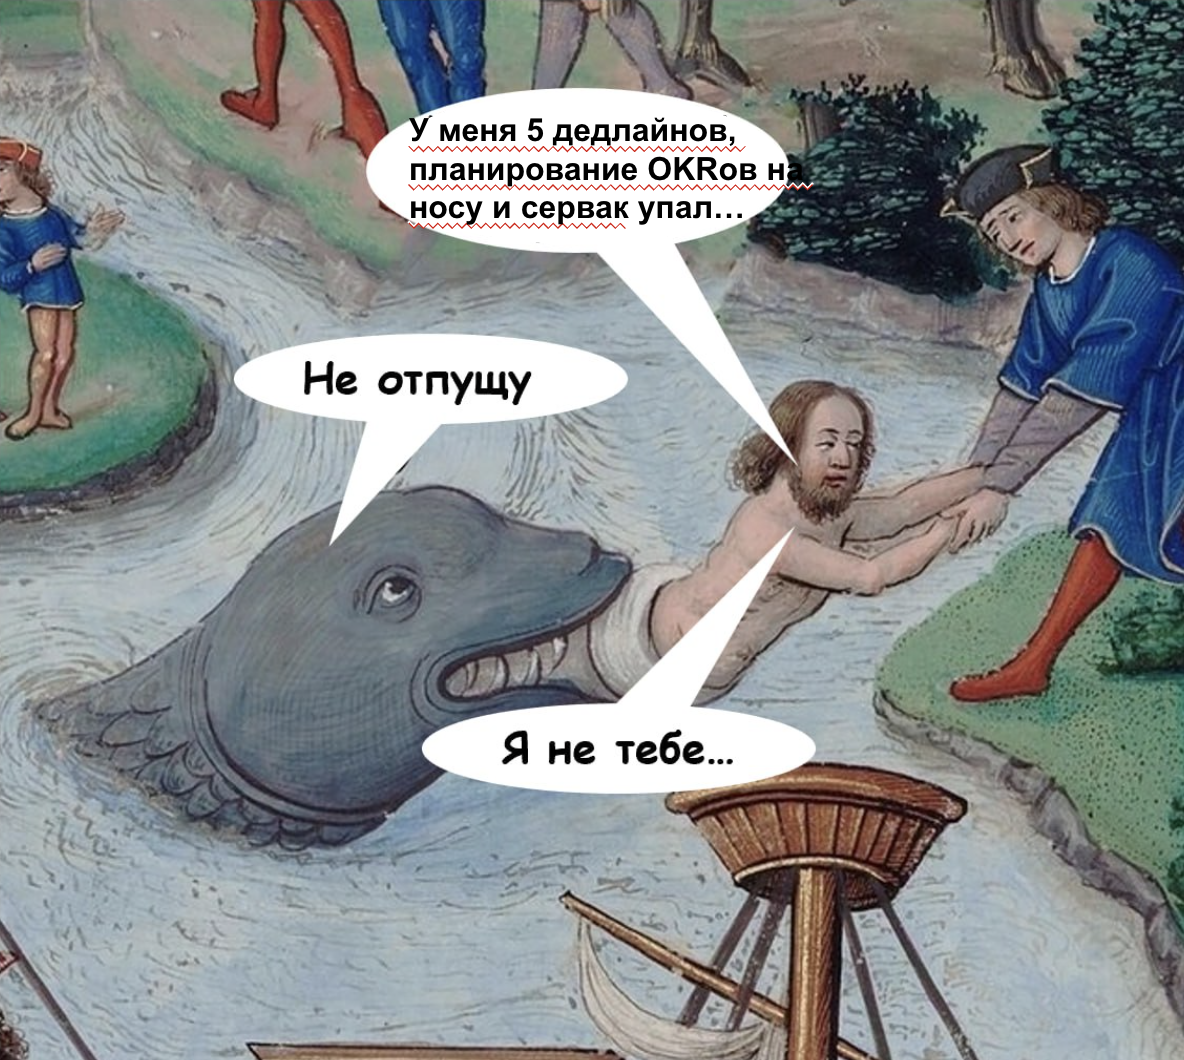

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

RMSE = 0.7911


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сохраните наилучшее значение, как бенчмарк на будущее

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = ...

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.